<a href="https://colab.research.google.com/github/retineuraliartificiali/keras_tutorial/blob/master/tutorial_keras_cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,GaussianNoise,AveragePooling2D


tot_train_examples = 60000
tot_test_examples = 10000
width=28
height=28
channels = 1
f_size1 = 128
f_size2= 64



(28, 28)


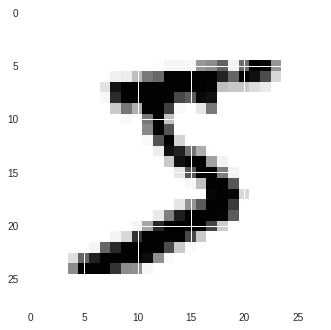

In [0]:
#scarica i dati e crea il dataset di train e di test
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
plt.imshow(Xtrain[0])
print(Xtrain[0].shape)

In [0]:
Xtrain_reshaped = Xtrain.reshape(tot_train_examples,width,height,channels)
Xtest_reshaped = Xtest.reshape(tot_test_examples,width,height,channels)

print("Nuova shape ",Xtrain_reshaped[0].shape)

Nuova shape  (28, 28, 1)


In [0]:
y_train_cat = to_categorical(ytrain)
y_test_cat = to_categorical(ytest)
print(y_train_cat[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
noise = 0.00008
#creazione della sequenza keras per il modello Convolutional Neural Network
model = Sequential()

#add model layers

model.add(Conv2D(f_size1, kernel_size=3, activation='relu', input_shape=(width,height,channels)))
model.add(GaussianNoise(noise))
model.add(Conv2D(f_size2, kernel_size=3, activation='relu'))
model.add(GaussianNoise(noise))
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None) )
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
model.fit(Xtrain_reshaped, y_train_cat, validation_data=(Xtest_reshaped, y_test_cat), epochs=10,batch_size=512)


#predict first 4 images in the test set
model.predict(X_test_res[:4])


#actual results for first 4 images in test set
y_test_cat[:4]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 320us/step - loss: 1.5396 - acc: 0.8476 - val_loss: 0.0699 - val_acc: 0.9774
Epoch 2/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.0620 - acc: 0.9809 - val_loss: 0.0508 - val_acc: 0.9835
Epoch 3/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0425 - acc: 0.9866 - val_loss: 0.0504 - val_acc: 0.9838
Epoch 4/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0314 - acc: 0.9900 - val_loss: 0.0439 - val_acc: 0.9871
Epoch 5/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0237 - acc: 0.9925 - val_loss: 0.0505 - val_acc: 0.9851
Epoch 6/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0180 - acc: 0.9942 - val_loss: 0.0541 - val_acc: 0.9

NameError: ignored